In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei' #顯示中文

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('input/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('input/test.csv', encoding = "utf-8")

In [4]:
#把示範用的 type 4, 資料去除, 以免干擾建模
train = train[train['type']!=4]

In [5]:
from sklearn.model_selection import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

[[14  0  0]
 [ 0  9  1]
 [ 0  0 12]]


## Grid Search
<p>scikit-learn example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html</p>
<p>scikit-learn    官網: http://scikit-learn.org/stable/</p>
<p>         中文教學說明: https://www.gitbook.com/book/htygithub/machine-learning-python/details </p>


In [8]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

for score in scores:
    print("# Tuning hyper-parameters for < %s > -------------------------" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print("mean_test_score (+/- std_test_score) for { paramaters..}")
    print("")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for < precision > -------------------------

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:
mean_test_score (+/- std_test_score) for { paramaters..}

0.119 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.119 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.940 (+/-0.105) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.119 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.119) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.940 (+/-0.105) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.927 (+/-0.129) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.947 (+/-0.119) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.934 (+/-0.127) for {'C': 1, 'kernel': 'linear'}
0.937 (+/-0.105) for {'C': 10, 'kernel': 'linear'}
0.921 (+/-0.134) for {'C': 100, 'kernel': 'linear'}
0.921 (+/-0.134) for {'C': 1000, 'kernel': 'linear'}

Detailed classificat

## Classifier comparison
<p>ref. https://machine-learning-python.kspax.io/Classification/ex4_Classifier_comparison.html</p>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Ana.",
         "Quadratic Discriminant Ana.", "XGBoost"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(kernel='rbf',C=100, gamma=0.001, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(n_estimators= 2000, max_depth= 4)]

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

test_std = sc.transform(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%r score: %0.04f" % (name, score))
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(clf.predict(test_std))
    print("--------------------------------------------------------------")
    

'Nearest Neighbors' score: 0.9722
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3]
--------------------------------------------------------------
'Linear SVM' score: 0.8889
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.80      0.80      0.80        10
          3       0.83      0.83      0.83        12

avg / total       0.89      0.89      0.89        36

[1 1 1 1 1 1 1 1 1 1 3 2 3 2 2 2 3 2 2 2 3 2 3 3 3 3 2 3 3 3]
--------------------------------------------------------------
'RBF SVM' score: 0.9722
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf',C=100, gamma=0.001, probability=True)
clf5 = AdaBoostClassifier()
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)
meta_clf = LinearDiscriminantAnalysis()
stacking_clf1 = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], meta_classifier=meta_clf)

clf1.fit(X_train_std, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train_std, y_train)
clf4.fit(X_train_std, y_train)
clf5.fit(X_train_std, y_train)
clf6.fit(X_train_std, y_train)
clf7.fit(X_train_std, y_train)
clf8.fit(X_train_std, y_train)
stacking_clf1.fit(X_train_std, y_train)

print('KNN Score:',clf1.score(X_test_std, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test_std, y_test))
print('SVC Score:',clf4.score(X_test_std, y_test))
print('AdaBoost Score:',clf5.score(X_test_std, y_test))
print('L-Discr. Score:',clf6.score(X_test_std, y_test))
print('Q-Discr. Score:',clf7.score(X_test_std, y_test))
print('XGBoost Score:',clf8.score(X_test_std, y_test))
print('Stacking Score:',stacking_clf1.score(X_test_std, y_test))
print("--------------------------------------------------------------")
print(stacking_clf1.predict(test_std))

KNN Score: 0.944444444444
RF Score: 0.972222222222
GNB Score: 0.972222222222
SVC Score: 0.972222222222
AdaBoost Score: 1.0
L-Discr. Score: 1.0
Q-Discr. Score: 1.0
XGBoost Score: 0.972222222222
Stacking Score: 1.0
--------------------------------------------------------------
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3]


In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

clf1 = LinearDiscriminantAnalysis()
clf2 = QuadraticDiscriminantAnalysis()
clf3 = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)
meta_clf = LinearDiscriminantAnalysis()
stacking_clf2 = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta_clf)

clf1.fit(X_train_std, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train_std, y_train)
stacking_clf2.fit(X_train_std, y_train)

print('L-Discr. Score:',clf1.score(X_test_std, y_test))
print('Q-Discr. Score:',clf2.score(X_test_std, y_test))
print('XGBoost Score:',clf3.score(X_test_std, y_test))
print('Stacking Score:',stacking_clf2.score(X_test_std, y_test))
print("--------------------------------------------------------------")
print(stacking_clf2.predict(test_std))

L-Discr. Score: 1.0
Q-Discr. Score: 1.0
XGBoost Score: 0.972222222222
Stacking Score: 1.0
--------------------------------------------------------------
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf',C=100, gamma=0.001, probability=True)
clf5 = AdaBoostClassifier()
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)

eclf1 = VotingClassifier(estimators=[('knn', clf1), ('rfc', clf2), ('gnb', clf3), ('svc', clf4),
                                    ('Ada', clf5), ('Lda', clf6), ('Qda', clf7), ('XGB', clf8)], 
                        voting='hard', weights=[1, 1, 1, 1, 1, 1, 1, 1])
eclf1.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, eclf1.predict(X_test_std)))
print("--------------------------------------------------------------")
print(eclf1.predict(test_std))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

--------------------------------------------------------------
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3]


In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

clf1 = LinearDiscriminantAnalysis()
clf2 = QuadraticDiscriminantAnalysis()
clf3 = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)

eclf2 = VotingClassifier(estimators=[('Lda', clf1), ('Qda', clf2), ('XGB', clf3)], 
                        voting='hard', weights=[1, 1, 1])
eclf2.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, eclf2.predict(X_test_std)))
print("--------------------------------------------------------------")
print(eclf2.predict(test_std))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        36

--------------------------------------------------------------
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


## Cross Validation

In [16]:
# Python機器學習與深度學習實作 課程教材
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

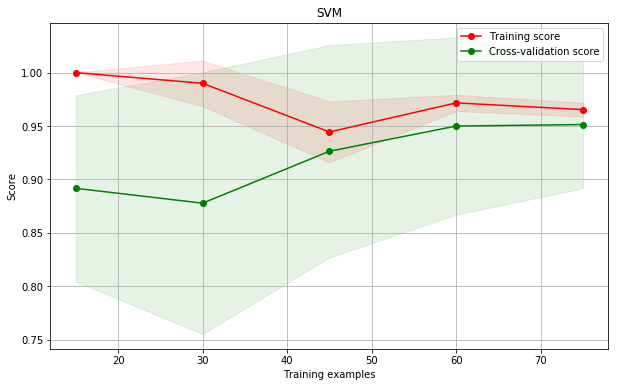

In [17]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = SVC(C=1.0, kernel="rbf", probability=True)

plot_learning_curve(estimator, "SVM", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

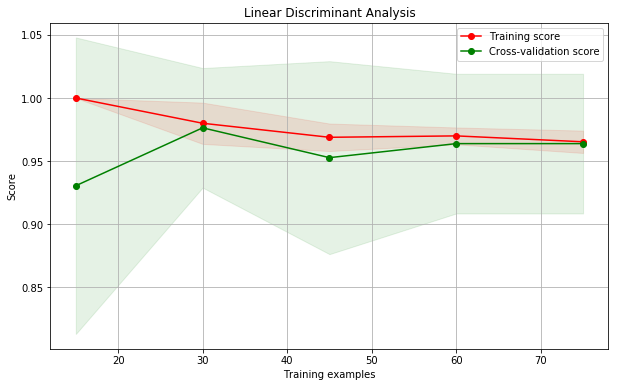

In [18]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearDiscriminantAnalysis()

plot_learning_curve(estimator, "Linear Discriminant Analysis", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

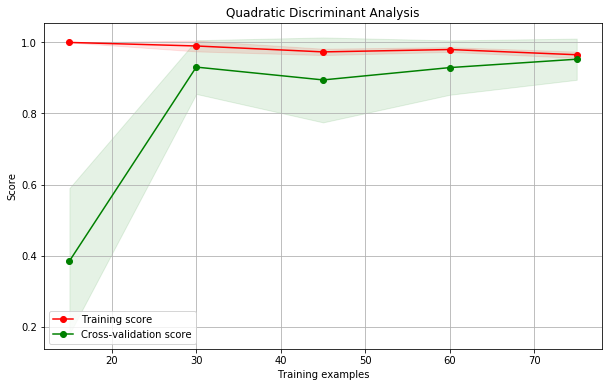

In [19]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = QuadraticDiscriminantAnalysis()

plot_learning_curve(estimator, "Quadratic Discriminant Analysis", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

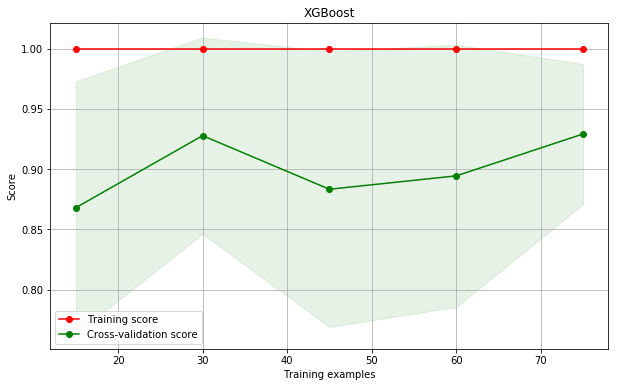

In [20]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)

plot_learning_curve(estimator, "XGBoost", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

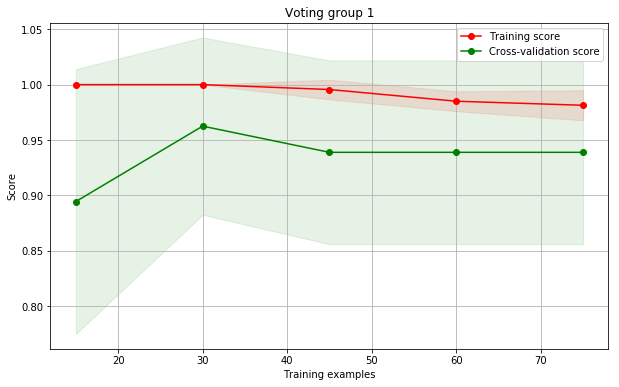

In [21]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = eclf1

plot_learning_curve(estimator, "Voting group 1", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

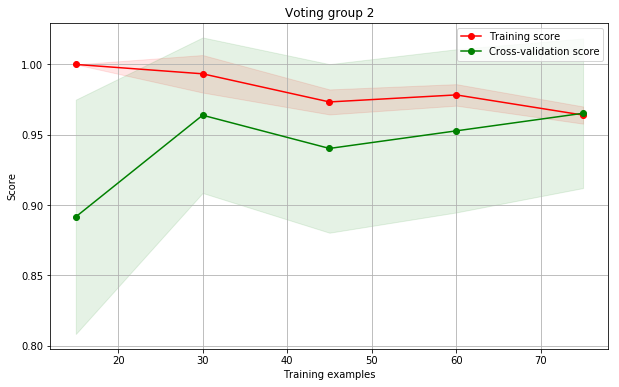

In [22]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = eclf2

plot_learning_curve(estimator, "Voting group 2", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

In [23]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def create_model(optimizer='adam', init='normal'):
    model = Sequential()
    model.add(Dense(512, input_dim=4, activation='relu', kernel_initializer=init))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer=init))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dense(3, activation='softmax', kernel_initializer=init))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [10, 20, 50]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_std, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940476 using {'batch_size': 5, 'epochs': 20, 'init': 'uniform', 'optimizer': 'adam'}
0.880952 (0.033672) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.904762 (0.016836) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.845238 (0.016836) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'rmsprop'}
0.904762 (0.044544) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'adam'}
0.869048 (0.033672) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.904762 (0.016836) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'adam'}
0.916667 (0.016836) with: {'batch_size': 5, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.916667 (0.016836) with: {'batch_size': 5, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.892857 (0.000000) with: {'batch_size': 5, 'epochs': 20, 'init': 'normal', 'optimize

In [32]:
def c_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(512, input_dim=4, activation='relu', kernel_initializer=init))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer=init))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dense(3, activation='softmax', kernel_initializer=init))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
15/15 [==============================] - 1s - loss: 1.0969 - acc: 0.4000     
Epoch 2/10
15/15 [==============================] - 0s - loss: 1.0854 - acc: 0.9333     
Epoch 3/10
15/15 [==============================] - 0s - loss: 1.0696 - acc: 1.0000     
Epoch 4/10
15/15 [==============================] - 0s - loss: 1.0407 - acc: 1.0000     
Epoch 5/10
15/15 [==============================] - 0s - loss: 0.9955 - acc: 1.0000     
Epoch 6/10
15/15 [==============================] - 0s - loss: 0.9279 - acc: 1.0000     
Epoch 7/10
15/15 [==============================] - 0s - loss: 0.8292 - acc: 1.0000     
Epoch 8/10
15/15 [==============================] - 0s - loss: 0.6887 - acc: 1.0000     
Epoch 9/10
15/15 [==============================] - 0s - loss: 0.5402 - acc: 1.0000     
Epoch 10/10
30/30 [==============================] - 1s - loss: 1.0932 - acc: 0.7000     
Epoch 2/10
30/30 [==============================] - 0s - loss: 1.0630 - acc: 0.9333     
Epoch 3/10
30/30 [==

60/60 [==============================] - 0s - loss: 0.1694 - acc: 0.9333     
Epoch 9/10
60/60 [==============================] - 0s - loss: 0.1180 - acc: 0.9667     
Epoch 10/10
75/75 [==============================] - 1s - loss: 1.0695 - acc: 0.8000     
Epoch 2/10
75/75 [==============================] - 0s - loss: 0.7886 - acc: 0.8000     
Epoch 3/10
75/75 [==============================] - 0s - loss: 0.4684 - acc: 0.7867     
Epoch 4/10
75/75 [==============================] - 0s - loss: 0.3414 - acc: 0.8133     
Epoch 5/10
75/75 [==============================] - 0s - loss: 0.2882 - acc: 0.8800     
Epoch 6/10
75/75 [==============================] - 0s - loss: 0.2465 - acc: 0.8933     
Epoch 7/10
75/75 [==============================] - 0s - loss: 0.1916 - acc: 0.8933     
Epoch 8/10
75/75 [==============================] - 0s - loss: 0.1439 - acc: 0.9600     
Epoch 9/10
75/75 [==============================] - 0s - loss: 0.1156 - acc: 0.9600     
Epoch 10/10
15/15 [============

45/45 [==============================] - 0s - loss: 0.3545 - acc: 0.8444     
Epoch 6/10
45/45 [==============================] - 0s - loss: 0.2894 - acc: 0.8667     
Epoch 7/10
45/45 [==============================] - 0s - loss: 0.2246 - acc: 0.8889     
Epoch 8/10
45/45 [==============================] - 0s - loss: 0.2013 - acc: 0.8889     
Epoch 9/10
45/45 [==============================] - 0s - loss: 0.1547 - acc: 0.9333     
Epoch 10/10
60/60 [==============================] - 2s - loss: 1.0788 - acc: 0.7500      
Epoch 2/10
60/60 [==============================] - 0s - loss: 0.9334 - acc: 0.7333     
Epoch 3/10
60/60 [==============================] - 0s - loss: 0.5868 - acc: 0.7333     
Epoch 4/10
60/60 [==============================] - 0s - loss: 0.3931 - acc: 0.8333     
Epoch 5/10
60/60 [==============================] - 0s - loss: 0.2677 - acc: 0.8500     
Epoch 6/10
60/60 [==============================] - 0s - loss: 0.2256 - acc: 0.9000     
Epoch 7/10
60/60 [============

30/30 [==============================] - 0s - loss: 1.0613 - acc: 0.7000     
Epoch 3/10
30/30 [==============================] - 0s - loss: 0.9764 - acc: 0.7000     
Epoch 4/10
30/30 [==============================] - 0s - loss: 0.7973 - acc: 0.6667     
Epoch 5/10
30/30 [==============================] - 0s - loss: 0.5985 - acc: 0.7000     
Epoch 6/10
30/30 [==============================] - 0s - loss: 0.4580 - acc: 0.8000     
Epoch 7/10
30/30 [==============================] - 0s - loss: 0.3616 - acc: 0.9000     
Epoch 8/10
30/30 [==============================] - 0s - loss: 0.2749 - acc: 0.9000     
Epoch 9/10
30/30 [==============================] - 0s - loss: 0.2322 - acc: 0.9000     
Epoch 10/10
45/45 [==============================] - 2s - loss: 1.0850 - acc: 0.7556      
Epoch 2/10
45/45 [==============================] - 0s - loss: 0.9987 - acc: 0.8000     
Epoch 3/10
45/45 [==============================] - 0s - loss: 0.7751 - acc: 0.6222     
Epoch 4/10
45/45 [============

75/75 [==============================] - ETA: 0s - loss: 0.1617 - acc: 0.953 - 0s - loss: 0.1573 - acc: 0.9600     
Epoch 10/10
15/15 [==============================] - 2s - loss: 1.0970 - acc: 0.4667     
Epoch 2/10
15/15 [==============================] - 0s - loss: 1.0861 - acc: 0.7333     
Epoch 3/10
15/15 [==============================] - 0s - loss: 1.0683 - acc: 0.8000     
Epoch 4/10
15/15 [==============================] - 0s - loss: 1.0390 - acc: 0.8667     
Epoch 5/10
15/15 [==============================] - 0s - loss: 0.9968 - acc: 0.8667     
Epoch 6/10
15/15 [==============================] - 0s - loss: 0.9180 - acc: 0.8667     
Epoch 7/10
15/15 [==============================] - 0s - loss: 0.8217 - acc: 0.8667     
Epoch 8/10
15/15 [==============================] - 0s - loss: 0.7047 - acc: 0.8667     
Epoch 9/10
15/15 [==============================] - 0s - loss: 0.5744 - acc: 0.8667     
Epoch 10/10
30/30 [==============================] - 2s - loss: 1.0921 - acc: 0.56

60/60 [==============================] - 0s - loss: 0.3748 - acc: 0.8500     
Epoch 6/10
60/60 [==============================] - 0s - loss: 0.3715 - acc: 0.8500     
Epoch 7/10
60/60 [==============================] - 0s - loss: 0.2779 - acc: 0.8833     
Epoch 8/10
60/60 [==============================] - 0s - loss: 0.2159 - acc: 0.8833     
Epoch 9/10
60/60 [==============================] - 0s - loss: 0.1911 - acc: 0.9167     
Epoch 10/10
75/75 [==============================] - 2s - loss: 1.0450 - acc: 0.7733     
Epoch 2/10
75/75 [==============================] - 0s - loss: 0.6912 - acc: 0.6800     
Epoch 3/10
75/75 [==============================] - 0s - loss: 0.4339 - acc: 0.7333     
Epoch 4/10
75/75 [==============================] - 0s - loss: 0.3464 - acc: 0.8800     
Epoch 5/10
75/75 [==============================] - 0s - loss: 0.3213 - acc: 0.8133     
Epoch 6/10
75/75 [==============================] - 0s - loss: 0.2426 - acc: 0.8800     
Epoch 7/10
75/75 [=============

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

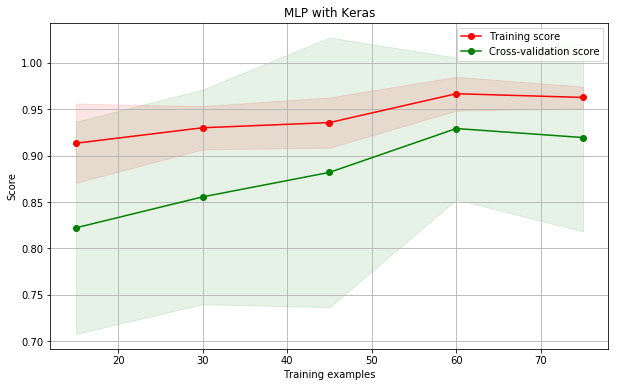

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasClassifier(build_fn=c_model, nb_epoch=20, batch_size=5)

plot_learning_curve(estimator, "MLP with Keras", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5),)